## Assignment 2

#### Implementation of needed classes and helpers

For the Graph class I used two additional classes: Node (Vertex) and Edge

Node class represents every vertex using two parameters: label and key. Label can have Any type the user needs, but key needs to be an integer that is unique in the graph. Additionally there are some getter methods and overloaded operators, to make the usage of Node class easier.

Edge class represents an Edge in graph using two vertices (fromVert and toVert). In our graph implementation we don't use the direction of a node, but it can be determined. Additionally there are some methods that are useful in the graph class implementation. Because of that we have a function that checks if a Node is in Edge, one that returns the second Node from the Edge and lastly, we have a dot representation of an Edge.

Graph class contains methods described in assignment plus some helpers, that provide clearer code. Every function (that is not an operator overload) is described using docstrings ("""...""") with taken parameters and output description. Additionally I tried to visualize most of the unconventional behaviors in the execution part of code.

In [2]:
#helpers
def MAX(sets):
    """
    Function takes sets (set or list) as argument and returns 0 if it's empty or maximum value from the set otherwise
    """
    return 0 if len(sets)==0 else max(sets)

In [3]:
class Node():
    def __init__(self, label, key):
        """
        Initialization of class Node with two arguments: label (with any type) and key (int) 
        """
        if not isinstance(key, int):
            raise Exception(f"Node key must be an intiger! Please provide value different than {key}")
        self._key = key
        self._label = label
   
    def __eq__(self, n):
        if self._key == n._key and self._label == n._label:
            return True
        else:
            return False
    
    def __hash__(self):
        return hash(self._key)
        
    def __repr__(self):
        return self._label
    
    def to_str(self):
        """
        Additional function to get full node representation, with given key to str" 
        """
        return f"{self._label}, {str(self._key)}"
    
    def getKey(self):
        """
        Getter function for node's key
        """
        return self._key
    
    def getLabel(self):
        """
        Getter function for node's label
        """
        return self._label

In [4]:
class Edge():
    def __init__(self, fromVert, toVert, weight=1):
        """
        Initialization of class Edge with three arguments:
        fromVert - Node object representing the begginning of edge 
        toVert - Node object representing the begginning of edge
        """
        self._fromVert = fromVert
        self._toVert = toVert
        self._weight = weight
        
    def __repr__(self):
        nodeList = [self._fromVert, self._toVert, self._weight]
        return '{}\n'.format(str(nodeList))
        
    def includes(self, vertKey):
        """
        Function with bool return type to check if vertex with given vertKey (int) is a part of edge
        """
        return True if self._fromVert.getKey() == vertKey or self._toVert.getKey() == vertKey else False
    
    def returnSecondVert(self, vertKey):
        """
        Returns the second vertex in edge with given vertKey (int)
        """
        if self.includes(vertKey):
            if self._fromVert.getKey() == vertKey:
                return self._toVert
            else:
                return self._fromVert
        return None
    
    def getDotRepr(self):
        """
        Returns string with dot representation of an edge
        """
        if self._weight == 1:
            return '"{fVert}" -- "{tVert}"'.format(fVert=self._fromVert.to_str(), tVert=self._toVert.to_str())
        else:
            return '"{fVert}" -- "{tVert}" [label={weight}]'.format(fVert=self._fromVert.to_str(), tVert=self._toVert.to_str(), weight=self._weight)

In [56]:
class Graph():
    def __init__(self, nodes=[]):
        """
        Initialization of graph class. List of nodes can be given as argument
        Every node is added to a set. If it's given not as a Node, a new node with new key is added
        """
        self._edges = []
        self._nodes = set()
        self._keys = set()
        for node in nodes:
            if isinstance(node, Node):
                if node.getKey() in self._keys:
                    self.checkKey(node)
                self._nodes.add(node)
                self._keys.add(node.getKey())
            else:
                new_key = MAX(self._keys)+1
                self._nodes.add(Node(node, new_key))
                self._keys.add(new_key)
        
    def __contains__(self, vertKey):
        return True if vertKey in self._keys else False

    def __str__(self):
        lines = 'graph new_graph { \n'
        for edge in self._edges:
            lines += '\t{dotEdge}\n'.format(dotEdge=edge.getDotRepr())
        lines += ('}')
        return lines
    
    def checkKey(self, vertex):
        """
        Helper function to throw an error if the user tries to add second Node with already existing key but different name
        """
        for node in self._nodes:
            if vertex.getKey() == node.getKey():
                if vertex.getLabel() != node.getLabel():
                    raise Exception(f"Node with given key: {str(vertex.getKey())} has different label equal to: {node.getLabel()} not {vertex.getLabel()}")

    def findVertexByKey(self, key):
        """
        Function returns the node with given key (int) or none if there's no node with that key
        """
        for node in self._nodes:
            if key == node.getKey():
                return node
        return None
    
    def findVertexByLabel(self, label):
        """
        Function returns the node with given label (any type) or none if there's no node with that label
        """
        for node in self._nodes:
            if label == node.getLabel():
                return node
        return None
    
    def addVertex(self, node):
        """
        Function adds new vertex to the graph. Every node can be given as Node object or any other type (then new key is assigned)
        """
        if isinstance(node, Node):
            if node.getKey() in self._keys:
                self.checkKey(node)
            self._nodes.add(node)
            self._keys.add(node.getKey())
        else:
            new_key = MAX(self._keys)+1
            self._nodes.add(Node(node, new_key))
            self._keys.add(new_key)
    
    def addVerticesFromList(self, vertList):
        """
        Function adds nodes from list (works just like addVertex())
        """
        for vert in vertList:
            self.addVertex(vert)
    
    def addEdge(self, fromVert, toVert, weight=1):
        """
        Function adds new Edge for given vertices (fromEdge, toEdge)
        also adds given Vertices to node list.
        """
        if not isinstance(fromVert, Node):
            fromVert = Node(fromVert, MAX(self._keys)+1)
        if not isinstance(toVert, Node):
            toVert = Node(toVert, MAX(self._keys)+1)
        self.addVerticesFromList([fromVert, toVert])
        self._edges.append(Edge(fromVert, toVert, weight))
    
    def addEdgesFromList(self, edgeList):
        """
        Function adds new Edges for given list of edges. They must be given as a list of objects of class Edge
        """
        for edge in edgeList:
            if isinstance(edge, Edge):
                self._edges.append(edge)
            else:
                raise Exception("edgeList must be a list of Edge objects if you want to add edge by nodes use addEdge()")
                
    def getVertices(self):
        """
        Returns list of nodes
        """
        return self._nodes
    
    def getEdges(self):
        """
        Returns list of edges
        """
        return self._edges

    def getNeighbors(self, vertKey):
        """
        Returns list of neighbors of the node, for the given vertKey (int)
        """
        if vertKey not in self._keys:
            raise Exception(f"Node {vertKey} doesn't exist")
        neighbors = []
        for edge in self._edges:
            if edge.returnSecondVert(vertKey) is not None:
                neighbors.append(edge.returnSecondVert(vertKey))
        return neighbors

    def saveGraph(self, name='example_graph'):
        """
        Saves graph to a txt file with dot representation. Name can be provided as an argument
        """
        lines = 'graph {n} {{ \n'.format(n=name)
        for edge in self._edges:
            lines += '\t{dotEdge}\n'.format(dotEdge=edge.getDotRepr())
        lines += ('}')
        txt_file = open(f"{name}.txt", "w")
        n = txt_file.write(lines)
        txt_file.close()
        return lines

    def getShortestPathDict(self, fromVert):
        """
        Returns dictionary with lengths from fromVert to every other node.
        As a helper function it takes only fromVert as a Node object
        """
        if isinstance(fromVert, Node):
            self.checkKey(fromVert)
            iterator = 1
            nodeDict = {fromVert:iterator-1}
            nextStepNodes = self.getNeighbors(fromVert.getKey())
            for node in nextStepNodes:
                nodeDict[node] = iterator
            tocheck = nextStepNodes
            while len(nodeDict.keys()) < len(self._nodes):
                tocheck = [i for i in nodeDict if nodeDict[i]==iterator]
                for vert in tocheck:
                    nextStepNodes = self.getNeighbors(vert.getKey())
                    for node in nextStepNodes: 
                        if node not in nodeDict.keys():
                            nodeDict[node] = iterator+1
                iterator += 1
            return nodeDict
        else:
            return {}
    
    def getShortestPaths(self, fromVert):
        """
        Returns string with the length of shortest path to every node from fromVert (Any)
        Throws exception if fromVert is not an element of graph
        """
        lines = ""
        if isinstance(fromVert, Node):
            pathsDict = self.getShortestPathDict(fromVert)
        elif isinstance(fromVert, int):
            if vert := self.findVertexByKey(fromVert):
                pathsDict = self.getShortestPathDict(vert)
        elif vert := self.findVertexByLabel(fromVert):
            pathsDict = self.getShortestPathDict(vert)
        else:
            raise Exception(f"Node {fromVert} doesn't exist")
        for key in pathsDict.keys():
            lines += key.to_str() + ": " + str(pathsDict[key]) + "\n"
        return lines

#### Examples of usage

Not all possible scenarios are presented, but there the most important examples and errors are presented.

In [57]:
g = Graph(['Alice', 'Bob'])

In [58]:
g.addVertex(Node('Carl', 3))
g.addVertex('David')
g.addVerticesFromList(['Frank', Node('Ernst', 6)])

In the next cell we try to add a node with already existing key, but different label to check that it fails.

In [59]:
g.addVertex(Node('frank', 6))

Exception: Node with given key: 6 has different label equal to: Ernst not frank

In [60]:
print(g.getVertices())

{Alice, Bob, Carl, David, Frank, Ernst}


In [61]:
4 in g

True

In [62]:
45 in g

False

For the addEdge() method we need to specify the particular node we want to add the Edge to. If we won't specify the key, algorithm adds new Node and Edge to the graph. 

In [63]:
g.addEdge(Node('Alice', 1), Node('Bob', 2))
g.addEdge(Node('Carl', 3), Node('Alice', 1))
g.addEdge(Node('Alice', 1), Node('David', 4))
g.addEdge(Node('Alice', 1), Node('Frank', 5))
g.addEdge(Node('Alice', 1), Node('Ernst', 6))
g.addEdge(Node('Bob', 2), Node('Gail', 7))
g.addEdge(Node('Gail', 7), Node('Harry', 8))
g.addEdge(Node('Harry', 8), Node('Jen', 9))
g.addEdge(Node('Jen', 9), Node('Gail', 7))
g.addEdge(Node('Harry', 8), Node('Irene', 10))
g.addEdge(Node('Irene', 10), Node('Gail', 7))
g.addEdge(Node('Irene', 10), Node('Jen', 9))
g.addEdge(Node('Ernst', 6), Node('Frank', 5))

In [64]:
g.addEdgesFromList([Edge(Node('David', 4), Node('Carl', 3)), Edge(Node('Carl', 3), Node('Frank', 5))])

In [65]:
print(g.getVertices())

{Alice, Bob, Carl, David, Frank, Ernst, Gail, Harry, Jen, Irene}


In [66]:
print(g.getEdges())

[[Alice, Bob, 1]
, [Carl, Alice, 1]
, [Alice, David, 1]
, [Alice, Frank, 1]
, [Alice, Ernst, 1]
, [Bob, Gail, 1]
, [Gail, Harry, 1]
, [Harry, Jen, 1]
, [Jen, Gail, 1]
, [Harry, Irene, 1]
, [Irene, Gail, 1]
, [Irene, Jen, 1]
, [Ernst, Frank, 1]
, [David, Carl, 1]
, [Carl, Frank, 1]
]


SaveGraph() method takes one additional argument, with name of the file and graph. Otherwise it will write the dot representation to example_raph.txt (output graph from graphviz on the bottom of the file).

In [67]:
print(g.saveGraph())

graph example_graph { 
	"Alice, 1" -- "Bob, 2"
	"Carl, 3" -- "Alice, 1"
	"Alice, 1" -- "David, 4"
	"Alice, 1" -- "Frank, 5"
	"Alice, 1" -- "Ernst, 6"
	"Bob, 2" -- "Gail, 7"
	"Gail, 7" -- "Harry, 8"
	"Harry, 8" -- "Jen, 9"
	"Jen, 9" -- "Gail, 7"
	"Harry, 8" -- "Irene, 10"
	"Irene, 10" -- "Gail, 7"
	"Irene, 10" -- "Jen, 9"
	"Ernst, 6" -- "Frank, 5"
	"David, 4" -- "Carl, 3"
	"Carl, 3" -- "Frank, 5"
}


Takes one argument that has to be na intiger because we only can give a key as argument here 

In [68]:
print(g.getNeighbors(1))

[Bob, Carl, David, Frank, Ernst]


If the key doesn't exist we get exception thrown.

In [69]:
print(g.getNeighbors(12))

Exception: Node 12 doesn't exist

Takes a node and returns shortest path to every other node (without taking the weight into count) It can be given as a node, as a node’s key or a label (with a condition that if there are two nodes with the same label, the function will throw an exception)

In [70]:
print(g.getShortestPaths(5))

Frank, 5: 0
Alice, 1: 1
Ernst, 6: 1
Carl, 3: 1
Bob, 2: 2
David, 4: 2
Gail, 7: 3
Harry, 8: 4
Jen, 9: 4
Irene, 10: 4



In [71]:
print(g.getShortestPaths(Node('Bob', 2)))

Bob, 2: 0
Alice, 1: 1
Gail, 7: 1
Carl, 3: 2
David, 4: 2
Frank, 5: 2
Ernst, 6: 2
Harry, 8: 2
Jen, 9: 2
Irene, 10: 2



In [72]:
print(str(g))

graph new_graph { 
	"Alice, 1" -- "Bob, 2"
	"Carl, 3" -- "Alice, 1"
	"Alice, 1" -- "David, 4"
	"Alice, 1" -- "Frank, 5"
	"Alice, 1" -- "Ernst, 6"
	"Bob, 2" -- "Gail, 7"
	"Gail, 7" -- "Harry, 8"
	"Harry, 8" -- "Jen, 9"
	"Jen, 9" -- "Gail, 7"
	"Harry, 8" -- "Irene, 10"
	"Irene, 10" -- "Gail, 7"
	"Irene, 10" -- "Jen, 9"
	"Ernst, 6" -- "Frank, 5"
	"David, 4" -- "Carl, 3"
	"Carl, 3" -- "Frank, 5"
}


Here is also an example of the situation when we add new node with existing label. After that all vertices are returned to show that now we have two nodes named 'Alice'

In [73]:
g.addVertex(Node('Alice', 12))

In [55]:
g.getVertices()

{Alice, Alice, Bob, Carl, David, Ernst, Frank, Gail, Harry, Irene, Jen}

Lastly, here's an image of the output from webgraphviz.com website with dot representation generated in the code

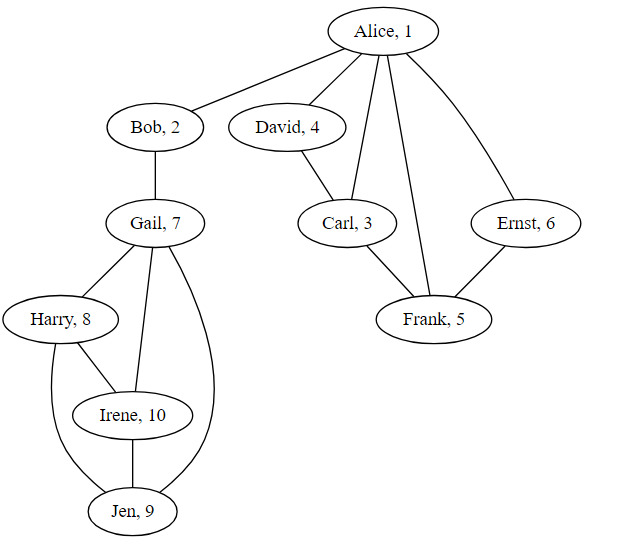